In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.figsize": (5, 5)})

In [21]:
test_i = 0
with open(f"../tests/{test_i}.test") as file:
    ue_num = int(file.readline())
    print(ue_num)

    toa_all = np.zeros([ue_num, 4])
    bs_pos = np.zeros((4, 2))
    ue_pos = np.zeros([ue_num, 2], float)

    file.readline()
    file.readline()

    for i in range(ue_num):
        line = file.readline()
        toa_all[i] = np.asarray(line.strip().split(" "), dtype=float)

    for i in range(4):
        bs_pos[i] = np.asarray(file.readline().split(" "), dtype=float)

    for i in range(ue_num):
        ue_pos[i] = np.asarray(file.readline().split(" "), dtype=float)


7


In [22]:
max_iter_num = 100
max_iter_ue = 50
room_size = 20
c_ns = 0.299792458

np.random.seed(47)


In [23]:
Q = np.zeros((2, 2))
M = (bs_pos[0] + bs_pos[1]) / 2
R = bs_pos[0] - M
Q = np.array([
    [R[0], -R[1]],
    [R[1], R[0]]
]) / np.linalg.norm(R)

In [24]:
h = []
m = max_iter_ue * 2

dd = []
ddt = []
for i in range(ue_num):
    ue_pos_i = ue_pos[i]
    c = np.linalg.norm(bs_pos[0] - bs_pos[1]) / 2
    dt = np.linalg.norm(ue_pos_i - bs_pos[0]) - np.linalg.norm(ue_pos_i - bs_pos[1])
    d = (toa_all[i, 0] - toa_all[i, 1]) * c_ns
    dd.append(d)
    ddt.append(dt)
    # print(f"d: {d}, true d: {d1}")
    a = np.abs(d) / 2
    if a > c:
        h.append([])
    else:
        # print(f"c: {c}, a: {a}", file=sys.stderr)
        b = np.sqrt(c ** 2 - a ** 2)
        tmax = max(np.arccosh(room_size / a), np.arcsinh(room_size / b))
        ts = np.log(1 + (np.linspace(0, 1, m // 2))) / np.log(2) * tmax
        # ts = (np.linspace(0, 1, m // 2)) ** 0.5  * tmax
        t = np.concatenate([-ts[::-1], ts])
        x = np.zeros((2, m))
        x[0] = np.sign(-d) * a * np.cosh(t)
        x[1] = b * np.sinh(t)
        y = Q @ x + M[:, None]
        y = y[:, (np.abs(y) > room_size / 2).sum(axis=0) == 0]
        h.append(y)

dd = np.array(dd)
ddt = np.array(ddt)
np.sqrt(np.mean((dd - ddt) ** 2))


3.2572109657830186

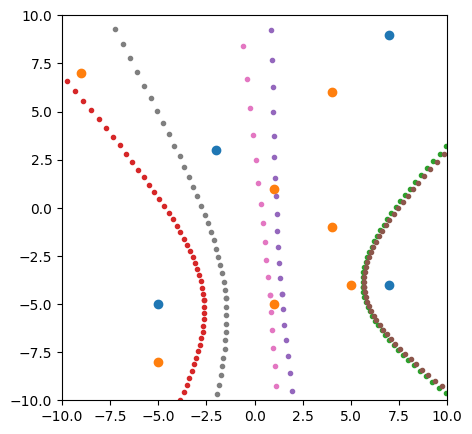

In [25]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_box_aspect(1)
ax.scatter(*bs_pos.T)
ax.scatter(*ue_pos.T)
for y in h:
    if len(y) > 0:
        # plt.plot(*y)
        plt.scatter(*y, linewidths=1, marker='.')
# ax.plot(*y)
plt.show()

## One UE

In [41]:
p = 1

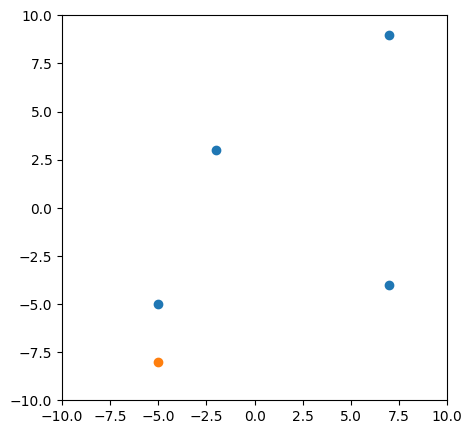

In [43]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_box_aspect(1)
ax.scatter(*bs_pos.T)
ax.scatter(*ue_pos[p].T)
y = h[p]
# plt.scatter(*y, linewidths=1, marker='.')
ax.plot(*y, color='green')
plt.show()

In [39]:
xy_i1 = bs_pos[1:] - bs_pos[0]
xy_i1

array([[12.,  1.],
       [ 3.,  8.],
       [12., 14.]])

In [44]:
cd = toa_all * c_ns
cd_i = cd[:, 1:] - cd[:, 0, None]
cd_i[p]

array([13.62646659, 11.1181031 , 17.75580791])

In [45]:
k = (bs_pos ** 2).sum(axis=1)

In [46]:
A = np.hstack((xy_i1, cd_i[p, :, None]))

In [47]:
A

array([[12.        ,  1.        , 13.62646659],
       [ 3.        ,  8.        , 11.1181031 ],
       [12.        , 14.        , 17.75580791]])

In [51]:
np.linalg.det(A)

-818.963143613285

In [48]:
b = (k[1:] - k[0] - cd_i[p] ** 2) / 2

In [49]:
pos, res, rank, s = np.linalg.lstsq(A, b, rcond=None)

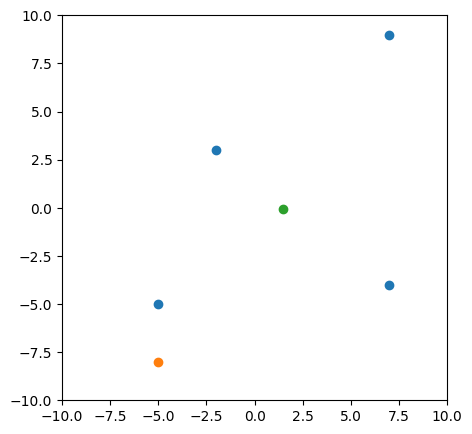

In [50]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_box_aspect(1)
ax.scatter(*bs_pos.T)
ax.scatter(*ue_pos[p].T)
ax.scatter(*pos[:-1])
y = h[p]
# plt.scatter(*y, linewidths=1, marker='.')
ax.plot(*y, color='green')
plt.show()